# Fundamentals of Knowledge Mining and Azure AI Search

## Introduction

Searching for information online has never been easier. However, it's still a challenge to find information from documents that aren't in a search index. For example, every day, people deal with unstructured, typed, image-based, or hand-written documents. Often, people must manually read through these documents to extract and record their insights in order to persist the found data. Now we have solutions that can automate information extraction.

Knowledge mining is the term used to describe solutions that involve extracting information from large volumes of often unstructured data. One of these knowledge mining solutions is Azure AI Search, a cloud search service that has tools for building user-managed indexes. The indexes can be used for internal only use, or to enable searchable content on public-facing internet assets.
Importantly, Azure AI Search can utilize the built-in capabilities of Azure AI services such as image processing, content extraction, and natural language processing to perform knowledge mining of documents. The product's AI capabilities makes it possible to index previously unsearchable documents and to extract and surface insights from large amounts of data quickly.

## What is Azure AI Search?

Azure AI Search provides the infrastructure and tools to create search solutions that extract data from various structured, semi-structured, and non-structured documents.

Azure AI Search results contain only your data, which can include text inferred or extracted from images, or new entities and key phrases detection through text analytics. It's a Platform as a Service (PaaS) solution. Microsoft manages the infrastructure and availability, allowing your organization to benefit without the need to purchase or manage dedicated hardware resources.

### Azure AI Search features
Azure AI Search exists to complement existing technologies and provides a programmable search engine built on Apache Lucene, an open-source software library. It's a highly available platform offering a 99.9% uptime SLA available for cloud and on-premises assets.

Azure AI Search comes with the following features:

- Data from any source: accepts data from any source provided in JSON format, with auto crawling support for selected data sources in Azure.
- Full text search and analysis: offers full text search capabilities supporting both simple query and full Lucene query syntax.
- AI powered search: has Azure AI capabilities built in for image and text analysis from raw content.
- Multi-lingual offers linguistic analysis for 56 languages to intelligently handle phonetic matching or language-specific linguistics. Natural language processors available in Azure AI Search are also used by Bing and Office.
- Geo-enabled: supports geo-search filtering based on proximity to a physical location.
- Configurable user experience: has several features to improve the user experience including autocomplete, autosuggest, pagination, and hit highlighting.

## Identify elements of a search solution
A typical Azure AI Search solution starts with a data source that contains the data artifacts you want to search. This could be a hierarchy of folders and files in Azure Storage, or text in a database such as Azure SQL Database or Azure Cosmos DB. The data format that Azure AI Search supports is JSON. Regardless of where your data originates, if you can provide it as a JSON document, the search engine can index it.

If your data resides in supported data source, you can use an indexer to automate data ingestion, including JSON serialization of source data in native formats. An indexer connects to a data source, serializes the data, and passes to the search engine for indexing. Most indexers support change detection, which makes data refresh a simpler exercise.

Besides automating data ingestion, indexers also support AI enrichment. You can attach a skillset that applies a sequence of AI skills to enrich the data, making it more searchable. A comprehensive set of built-in skills, based on Azure AI services APIs, can help you derive new fields – for example by recognizing entities in text, translating text, evaluating sentiment, or predicting appropriate captions for images. Optionally, enriched content can be sent to a knowledge store, which stores output from an AI enrichment pipeline in tables and blobs in Azure Storage for independent analysis or downstream processing.

Whether you write application code that pushes data to an index - or use an indexer that automates data ingestion and adds AI enrichment - the fields containing your content are persisted in an index, which can be searched by client applications. The fields are used for searching, filtering, and sorting to generate a set of results that can be displayed or otherwise used by the client application.

## Use a skillset to define an enrichment pipeline

AI enrichment refers to embedded image and natural language processing in a pipeline that extracts text and information from content that can't otherwise be indexed for full text search.

AI processing is achieved by adding and combining skills in a skillset. A skillset defines the operations that extract and enrich data to make it searchable. These AI skills can be either built-in skills, such as text translation or Optical Character Recognition (OCR), or custom skills that you provide.

### Built in skills

Built-in skills are based on pretrained models from Microsoft, which means you can't train the model using your own training data. Skills that call the Azure AI services APIs have a dependency on those services and are billed at the Azure AI services pay-as-you-go price when you attach a resource. Other skills are metered by Azure AI Search, or are utility skills that are available at no charge.

Built-in skills fall into these categories:

Natural language processing skills: with these skills, unstructured text is mapped as searchable and filterable fields in an index.

Some examples include:

- Key Phrase Extraction: uses a pre-trained model to detect important phrases based on term placement, linguistic rules, proximity to other terms, and how unusual the term is within the source data.
- Text Translation Skill: uses a pre-trained model to translate the input text into various languages for normalization or localization use cases.

Image processing skills: creates text representations of image content, making it searchable using the query capabilities of Azure AI Search.

Some examples include:
- Image Analysis Skill: uses an image detection algorithm to identify the content of an image and generate a text description.
- Optical Character Recognition Skill: allows you to extract printed or handwritten text from images, such as photos of street signs and products, as well as from documents—invoices, bills, financial reports, articles, and more.


## Understand indexes

An Azure AI Search index can be thought of as a container of searchable documents. Conceptually you can think of an index as a table and each row in the table represents a document. Tables have columns, and the columns can be thought of as equivalent to the fields in a document. Columns have data types, just as the fields do on the documents.

### Index schema

In Azure AI Search, an index is a persistent collection of JSON documents and other content used to enable search functionality. The documents within an index can be thought of as rows in a table, each document is a single unit of searchable data in the index.

The index includes a definition of the structure of the data in these documents, called its schema. An example of an index schema with AI-extracted fields keyphrases and imageTags is below:

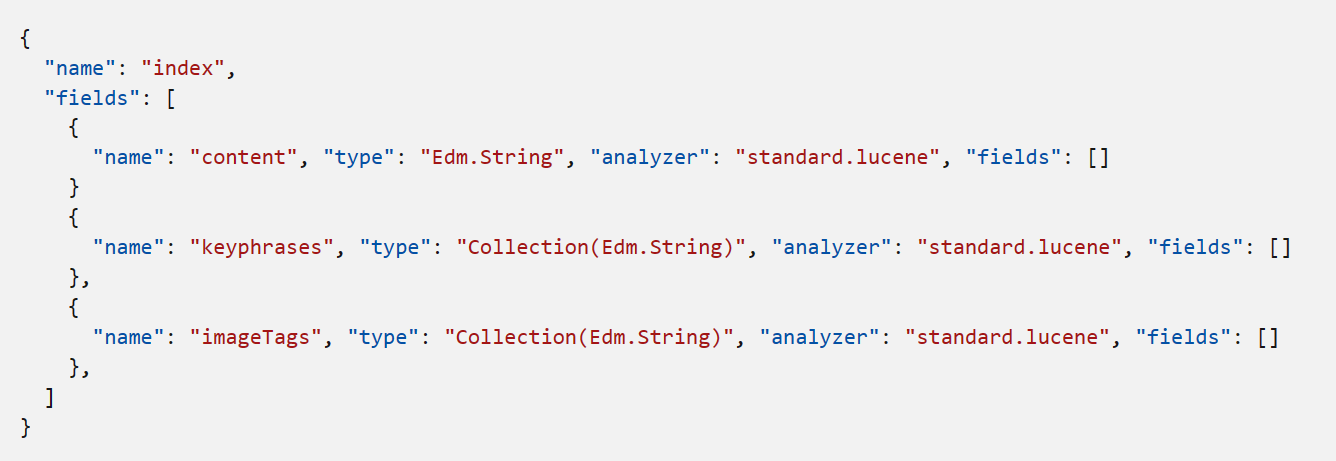

### Index attributes

Azure AI Search needs to know how you would like to search and display the fields in the documents. You specify that by assigning attributes, or behaviors, to these fields. For each field in the document, the index stores its name, the data type, and supported behaviors for the field such as, is the field searchable, can the field be sorted?

The most efficient indexes use only the behaviors that are needed. If you forget to set a required behavior on a field when designing, the only way to get that feature is to rebuild the index.

The following image depicts the fields when designing an index in Azure:

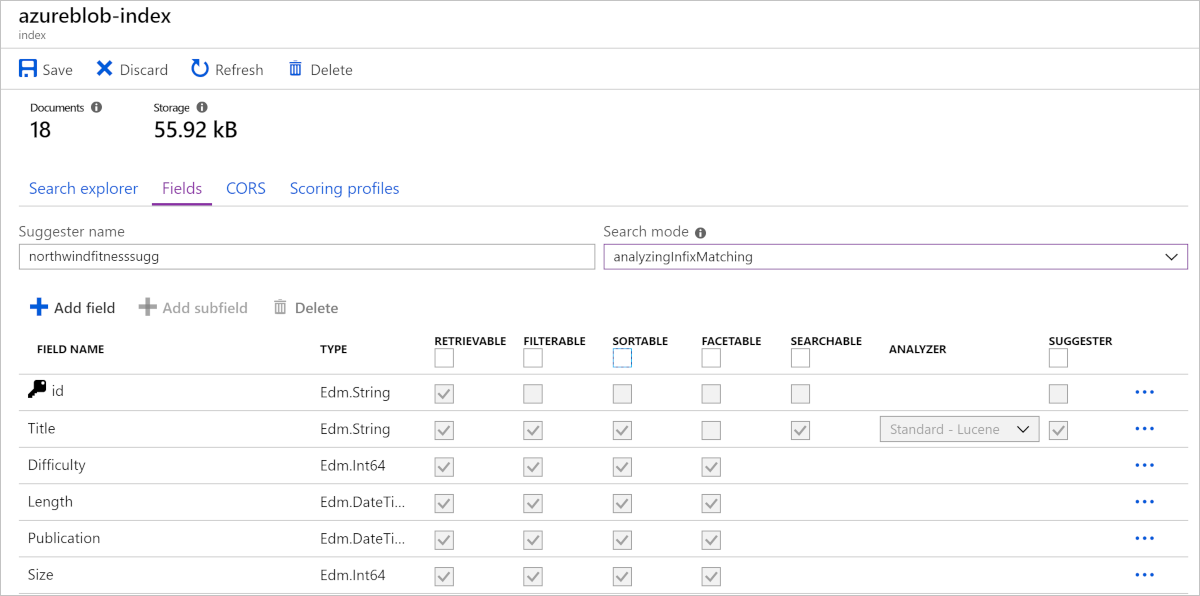

## Use an indexer to build an index
In order to index the documents in Azure Storage, they need to be exported from their original file type to JSON. In order to export data in any format to JSON, and load it into an index, we use an indexer.

To create search documents, you can either generate JSON documents with application code or you can use Azure's indexer to export incoming documents into JSON.

Azure AI Search lets you create and load JSON documents into an index with two approaches:

- Push method: JSON data is pushed into a search index via either the REST API or the .NET SDK. Pushing data has the most flexibility as it has no restrictions on the data source type, location, or frequency of execution.

- Pull method: Search service indexers can pull data from popular Azure data sources, and if necessary, export that data into JSON if it isn't already in that format.

### Use the pull method to load data with an indexer

Azure AI Search's indexer is a crawler that extracts searchable text and metadata from an external Azure data source and populates a search index using field-to-field mappings between source data and your index. Using the indexer is sometimes referred to as a 'pull model' approach because the service pulls data in without you having to write any code that adds data to an index. An indexer maps source fields to their matching fields in the index.

### Data import monitoring and verification

The search services overview page has a dashboard that lets you quickly see the health of the search service. On the dashboard, you can see how many documents are in the search service, how many indexes have been used, and how much storage is in use.

When loading new documents into an index, the progress can be monitored by clicking on the index's associated indexer. The document count will grow as documents are loaded into the index. In some instances, the portal page can take a few minutes to display up-to-date document counts. Once the index is ready for querying, you can then use Search explorer to verify the results. An index is ready when the first document is successfully loaded.

Indexers only import new or updated documents, so it is normal to see zero documents indexed.

The Search explorer can perform quick searches to check the contents of an index, and ensure that you are getting expected search results. Having this tool available in the portal enables you to easily check the index by reviewing the results that are returned as JSON documents.

### Making changes to an index

You have to drop and recreate indexes if you need to make changes to field definitions. Adding new fields is supported, with all existing documents having null values. You'll find it faster using a code-based approach to iterate your designs, as working in the portal requires the index to be deleted, recreated, and the schema details to be manually filled out.

An approach to updating an index without affecting your users is to create a new index under a different name. You can use the same indexer and data source. After importing data, you can switch your app to use the new index.

## Persist enriched data in a knowledge store

A knowledge store is persistent storage of enriched content. The purpose of a knowledge store is to store the data generated from AI enrichment in a container. For example, you may want to save the results of an AI skillset that generates captions from images.

Recall that skillsets move a document through a sequence of enrichments that invoke transformations, such as recognizing entities or translating text. The outcome can be a search index, or projections in a knowledge store. The two outputs, search index and knowledge store, are mutually exclusive products of the same pipeline; derived from the same inputs, but resulting in output that is structured, stored, and used in different applications.

While the focus of an Azure AI Search solution is usually to create a searchable index, you can also take advantage of its data extraction and enrichment capabilities to persist the enriched data in a knowledge store for further analysis or processing.
A knowledge store can contain one or more of three types of projection of the extracted data:

- Table projections are used to structure the extracted data in a relational schema for querying and visualization
- Object projections are JSON documents that represent each data entity
- File projections are used to store extracted images in JPG format

## Create an index in the Azure portal
Before using an indexer to create an index, you'll first need to make your data available in a supported data source. Supported data sources include:

- Cosmos DB (SQL API)
- Azure SQL (database, managed instance, and SQL Server on an Azure VM)
- Azure Storage (Blob Storage, Table Storage, ADLS Gen2)

Using the Azure portal's Import data wizard

### Using the Azure portal's Import data wizard

Once your data is in an Azure data source, you can begin using Azure AI Search. Contained within the Azure AI Search service in Azure portal is the Import data wizard, which automates processes in the Azure portal to create various objects needed for the search engine. You can see it in action when creating any of the following objects using the Azure portal:

- Data Source: Persists connection information to source data, including credentials. A data source object is used exclusively with indexers.
- Index: Physical data structure used for full text search and other queries.
- Indexer: A configuration object specifying a data source, target index, an optional AI skillset, optional schedule, and optional configuration settings for error handling and base-64 encoding.
- Skillset: A complete set of instructions for manipulating, transforming, and shaping content, including analyzing and extracting information from image files. Except for very simple and limited structures, it includes a reference to an Azure AI services resource that provides enrichment.
- Knowledge store: Stores output from an AI enrichment pipeline in tables and blobs in Azure Storage for independent analysis or downstream processing.

To use Azure AI Search, you'll need an Azure AI Search resource. You can create a resource in the Azure portal. Once the resource is created, you can manage components of your service from the resource Overview page in the portal.

You can build Azure search indexes using the Azure portal or programmatically with the REST API or software development kits (SDKs).

## Query data in an Azure AI Search index

Index and query design are closely linked. After we build the index, we can perform queries. A crucial component to understand is that the schema of the index determines what queries can be answered.
Azure AI Search queries can be submitted as an HTTP or REST API request, with the response coming back as JSON. Queries can specify what fields are searched and returned, how search results are shaped, and how the results should be filtered or sorted. A query that doesn't specify the field to search will execute against all the searchable fields within the index.
Azure AI Search supports two types of syntax: simple and full Lucene. Simple syntax covers all of the common query scenarios, while full Lucene is useful for advanced scenarios.

### Simple query requests

A query request is a list or words (search terms) and query operators (simple or full) of what you would like to see returned in a result set. Let's look what components make up a search query. Consider this simple search example:

```
coffee (-"busy" + "wifi")
```

This query is trying to find content about coffee, excluding busy and including wifi.

Breaking the query into components, it's made up of search terms (coffee), plus two verbatim phrases, "busy" and "wifi", and operators (-, +, and ( )). The search terms can be matched in the search index in any order or location in the content. The two phrases will only match with exactly what is specified, so wi-fi would not be a match. Finally, a query can contain a number of operators. In this example, the - operator tells the search engine that these phrases should NOT be in the results. The parenthesis group terms together, and set their precedence.

By default, the search engine will match any of the terms in the query. Content containing just coffee would be a match. In this example, using -"busy" would lead to the search results including all content that doesn't have the exact string "busy" in it.

The simple query syntax in Azure AI Search excludes some of the more complex features of the full Lucene query syntax, and it's the default search syntax for queries.

You can learn more about query syntax in the [documentation](https://learn.microsoft.com/en-us/azure/search/query-odata-filter-orderby-syntax).